Importing required Modules

https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

In [1]:
import numpy as np
import cv2 
import imutils
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

Showing and Loading Image

In [2]:
image = cv2.imread(r'C:\Users\92333\Desktop\faces.jpg')

In [3]:
cv2.imshow('Image',image)
cv2.waitKey(0)

-1

In [4]:
h,w,d= image.shape

In [7]:
print('height:%d width:%d depth:%d'%(h,w,d))

height:1260 width:1071 depth:3


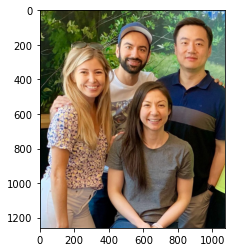

In [11]:
#bgr to rgb
rgbimage=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rgbimage)
plt.show()

Getting the ROI

In [46]:
roi = image[210:520, 160:400]
cv2.imshow("ROI", roi)
cv2.waitKey(0)

-1

Resizing Image

In [31]:
resized = imutils.resize(image, width=400)
cv2.imshow("Imutils Resize", resized)
cv2.waitKey(0)

-1

Rotating Image

In [27]:
rotated = imutils.rotate(resized, -45)
cv2.imshow("Imutils Rotation", rotated)
cv2.waitKey(0)

-1

In [28]:
rotated = imutils.rotate_bound(resized, -45)
cv2.imshow("Imutils Bound Rotation", rotated)
cv2.waitKey(0)

-1

Blurring Image

In [41]:
#Larger kernels would yield a more blurry image. Smaller kernels will create less blurry images. 
blurred = cv2.GaussianBlur(resized, (45,45), 0)
cv2.imshow("Blurred", blurred)
cv2.waitKey(0)

-1

In [40]:
blurred = cv2.GaussianBlur(resized, (11,11), 0)
cv2.imshow("Blurred", blurred)
cv2.waitKey(0)

-1

drawing on image

In [81]:
cop=resized.copy()


cv2.rectangle(image, start_point, end_point, color, thickness)

In [83]:
cv2.rectangle(cop, (150, 200),(60, 80), (0, 0, 255), 2)
cv2.imshow("Rectangle", cop)
cv2.waitKey(0)


-1

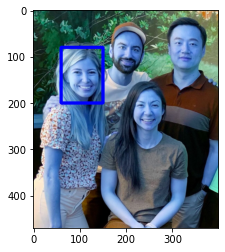

In [84]:
img=cv2.rectangle(cop, (150, 200),(60, 80), (0, 0, 255), 2)
plt.imshow(img)
plt.show()

COUNTING OBJECTS 
Along the way we’ll be:

Learning how to convert images to grayscale with OpenCV
Performing edge detection
Thresholding a grayscale image
Finding, counting, and drawing contours
Conducting erosion and dilation
Masking an image


In [87]:
shapes=cv2.imread(r'C:\Users\92333\DeepLearningProjects\shapes.png')

In [93]:
cv2.imshow('shapes',shapes)
cv2.waitKey(0)

-1

In [94]:
gs=cv2.cvtColor(shapes,cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gs)
cv2.waitKey(0)

-1

In [108]:
blr = cv2.GaussianBlur(gs, (5,5), 0)
cv2.imshow("Blurred", blr)
cv2.waitKey(0)

-1

DETECTING EDGES

In [110]:
edges=cv2.Canny(blr,70,150)
cv2.imshow("Edged", edges)
cv2.waitKey(0)
#plt.imshow(edges)
#plt.show()

-1

DETECTING CONTOURS

In [118]:
import skimage 
from skimage.filters import threshold_otsu

In [130]:
thresh = cv2.threshold(blr, 230, 255, cv2.THRESH_BINARY_INV)[1]
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)

-1

In [120]:
val=threshold_otsu(blr)


In [121]:
mask = blr < val


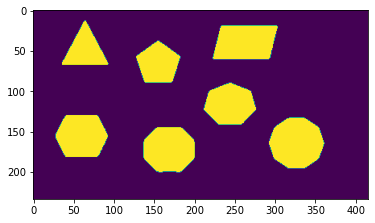

In [123]:
plt.imshow(mask)
plt.show()

In [131]:
threshcopy=thresh.copy()
cnts=cv2.findContours(threshcopy,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [132]:
cnts=imutils.grab_contours(cnts)
op=shapes.copy()

In [134]:
for c in cnts:
    cv2.drawContours(op,[c],-1,(240,0,159),3)
    #[c] is the list containing cnt, -1 shows that all contours are to be drawn
    #the tuple of size 3 shows the color with which the contour will be drawn
    #last argument is the thickness
    cv2.imshow("Contours",op)
    cv2.waitKey(0)

-1

In [136]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(op, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,(255, 0, 0), 2)
cv2.imshow("Contours", op)
cv2.waitKey(0)

-1